<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BodyWeightKg          60 non-null     float64
 1   BodyLengthCm          60 non-null     int64  
 2   LegCount              60 non-null     int64  
 3   HasFur                60 non-null     int64  
 4   HasFeathers           60 non-null     int64  
 5   CanFly                60 non-null     int64  
 6   LaysEggs              60 non-null     int64  
 7   AverageLifespanYears  60 non-null     int64  
 8   Species               60 non-null     object 
dtypes: float64(1), int64(7), object(1)
memory usage: 4.3+ KB
Duplicate rows: 0


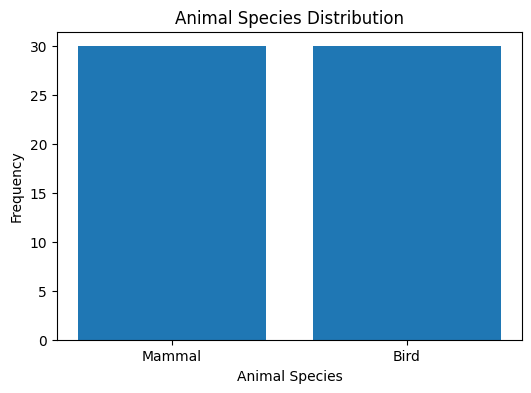

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("animals.csv")

# Basic inspection
df.head()
df.info()
df.describe()

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Class distribution
counts = df["Species"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(x=counts.index, height=counts.values)
plt.xlabel("Animal Species")
plt.ylabel("Frequency")
plt.title("Animal Species Distribution")
plt.savefig("species_distribution.png")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Species"])
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



(48, 8)
(12, 8)
(48,)
(12,)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_preds = knn.predict(X_test)



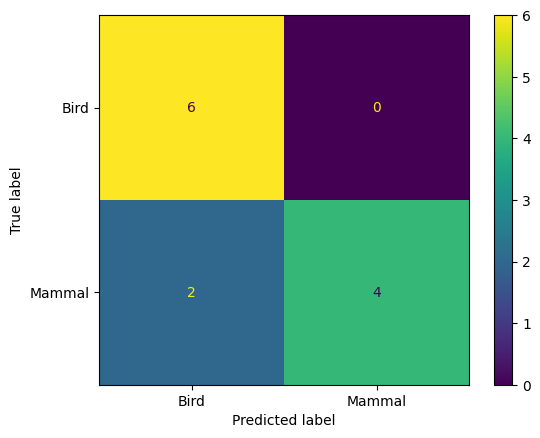

In [9]:
cm = confusion_matrix(y_test, y_preds)

cm_plot = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=knn.classes_
)

cm_plot.plot()
plt.savefig("animal_cm.png")
plt.show()


In [10]:
import joblib

joblib.dump(knn, "animal_knn_model.joblib")
print("MODEL SAVED SUCCESSFULLY")


MODEL SAVED SUCCESSFULLY


In [11]:
sample = X_test.sample(1, random_state=1)
sample_pred = knn.predict(sample)

print("Sample features:")
print(sample)

print("Predicted species:")
print(sample_pred[0])


Sample features:
    BodyWeightKg  BodyLengthCm  LegCount  HasFur  HasFeathers  CanFly  \
14           0.3            30         4       1            0       0   

    LaysEggs  AverageLifespanYears  
14         0                    10  
Predicted species:
Bird
